In [1]:
import pandas as pd                                                                
import numpy as np                                                                 
import matplotlib.pyplot as plt                                                    
import seaborn as sns                                                              
sns.set()                                                                         
from ipywidgets import HBox, Label, IntSlider, widgets, FloatSlider, interactive_output, VBox, fixed
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

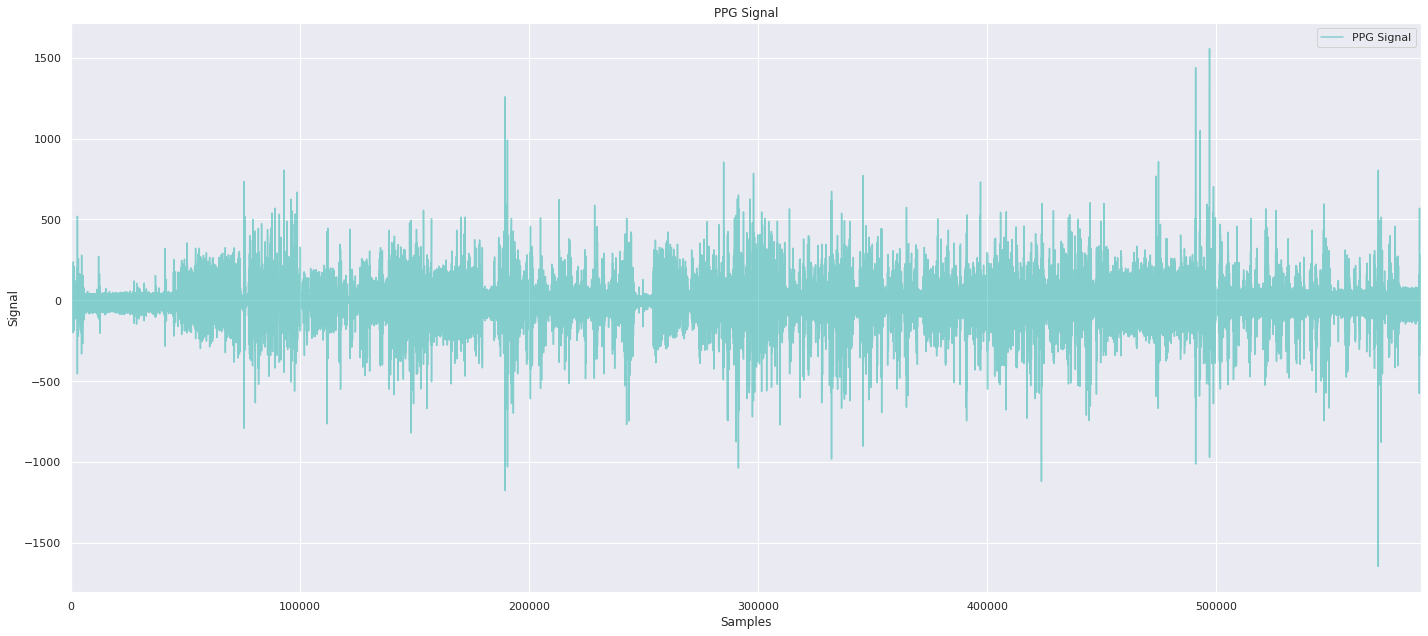

In [2]:
#reading and visualizing signal
data = pd.read_csv('PPG.csv')
n = len(data)
#the sampling rate of the signal is 64Hz
fs = 64
fig, ax = plt.subplots(figsize=(20, 9))
ax.plot(np.arange(n), data.signal, color='lightseagreen', alpha=0.5, label='PPG Signal')
ax.set_xlim(0, n)
ax.set_xlabel('Samples')
ax.set_ylabel('Signal')
ax.set_title('PPG Signal')
ax.legend()
fig.tight_layout()
plt.show()

In [3]:
#calculatin fft and Power Spectral Density
ppg = np.array(data.signal)
ppg_fft = np.fft.fft(ppg)
ppg_psd = ppg_fft * np.conjugate(ppg_fft) / n
f = (fs/n) * np.arange(n)

In [4]:
#plotting psd with thresholds
def plot_psd(thresh, xmax, xmin):
    
    if xmax < xmin:
        raise ValueError('xmax cannot be greater than xmin')
    
    fig1, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [1.4, 3.6]}, figsize=(30, 12))
    ax[0].plot(f[:n//2], ppg_psd[:n//2], color='lightseagreen', alpha=0.5, label='PSD')
    ax[0].axhline(y=thresh,linestyle='--', color='black')
    ax[0].set_xlabel('Frequency')
    ax[0].set_ylabel('Power')
    ax[0].set_title('PSD')
    ax[0].legend()
    
    ppg_fft_thresh = [0 if ppg_psd[i] < thresh else ppg_fft[i] for i in range(n)]
    ppg_ifft_thresh = np.fft.ifft(ppg_fft_thresh)
    
    ax[1].plot(np.arange(n), ppg, color='lightseagreen', alpha=0.5, label='Original Signal')
    ax[1].plot(np.arange(n), ppg_ifft_thresh, color='black', label='PSD < {}'.format(thresh))
    ax[1].set_title('threshold : {}'.format(thresh))
    ax[1].set_xlabel('Samples')
    ax[1].set_ylabel('Signal')
    ax[1].set_xlim(xmin, xmax)
    ax[1].legend()
    fig.tight_layout()
    plt.show()
    
    

In [5]:
thresh_slider = IntSlider(min=ppg_psd.min(), max=ppg_psd.max(), value=ppg_psd.max()/4, continuous_update=False)
xmax_slider = IntSlider(min=0, max=n, value=n, continuous_update=False)
xmin_slider = IntSlider(min=0, max=n, value=0, continuous_update=False)
thresh_box = HBox([Label('threshold : '), thresh_slider])
xmax_box = HBox([Label('XMAX ; '), xmax_slider])
xmin_box = HBox([Label('XMIN : '), xmin_slider])
box  = VBox([xmax_box, xmin_box])
ui = HBox([thresh_box, box])
#display(ui)

In [6]:
out = interactive_output(plot_psd, {'thresh':thresh_slider, 'xmax':xmax_slider, 'xmin':xmin_slider})
display(ui, out)

Output()

In [7]:
#filtering using butterworth filter
def plot_filtered(thresh, order, xmax, xmin):
    
    if xmax < xmin:
        raise ValueError('xmax cannot be greater than xmin')
        
    sos = signal.butter(order, thresh, btype='lowpass', output='sos', fs=64)
    filtered_signal = signal.sosfilt(sos, ppg)
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(np.arange(n), ppg, color='lightseagreen', alpha=0.5, label='Original Signal')
    ax.plot(np.arange(n), filtered_signal, color='black', label='Lowpass : {}Hz'.format(thresh))
    ax.set_xlabel('Samples')
    ax.set_ylabel('Signal')
    ax.set_xlim(0, n)
    ax.set_xlim(xmin, xmax)
    ax.legend()
    ax.set_title('Using Butterworth Filter')
    

In [8]:
f_slider = FloatSlider(min=0, max=30, value=1.5)
ord_slider = IntSlider(min=0, max=10, value=10)
xmax_slider = IntSlider(min=0, max=n, value=n, continuous_update=False)
xmin_slider = IntSlider(min=0, max=n, value=0, continuous_update=False)
xmax_box = HBox([Label('XMAX'), xmax_slider])
xmin_box = HBox([Label('XMIN'), xmin_slider])
box = VBox([xmax_box, xmin_box])
f_box = HBox([Label('Lowpass Cutoff Frequency : '), f_slider])
ord_box = HBox([Label('Order'), ord_slider])
ui = HBox([f_box, ord_box, box])
#display(ui)

In [9]:
out = interactive_output(plot_filtered, {'thresh':f_slider, 'order':ord_slider, 'xmax':xmax_slider, 'xmin':xmin_slider})
display(ui, out)

Output()